# ANN MODEL

QUESTION:

You are tasked with performing sentiment analysis on the IMDb movie review dataset using an Artificial Neural Network (ANN). The dataset contains movie reviews labeled as positive or negative.

• Design, implement, and evaluate an ANN model to classify the sentiment of IMDb movie reviews (positive or negative).

• Explain the preprocessing steps, model architecture, and performance evaluation results in your submission.

• Use One or more hidden layers with ReLU activation and an output layer with sigmoid activation for binary classification.

• Use the binary cross-entropy loss function for training the model.

• Provide the source code, the explanation of each step and visualize the necessary EDA steps and results.

• Justify the use of the ReLU and sigmoid activation functions.

• Explain why binary cross-entropy is suitable for this task.

In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset (adjust the path to your dataset)
data = pd.read_csv('/content/dataset.csv')

# Preprocess the text data
reviews = data['review'].values
sentiments = data['sentiment'].values

# Convert sentiments to binary labels (0 for negative, 1 for positive)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(sentiments)

# Tokenize the text reviews
tokenizer = Tokenizer(num_words=10000)  # Use the top 10,000 most common words
tokenizer.fit_on_texts(reviews)
X = tokenizer.texts_to_sequences(reviews)

# Pad sequences to ensure consistent input length
max_len = 200
X_padded = pad_sequences(X, maxlen=max_len, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Shape of training and test data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(40000, 200) (10000, 200) (40000,) (10000,)


The preprocessing steps here are:

i) Loading the dataset.

ii) Placing the reviews and sentiments in different variables.

iii) Encoding the values in the sentiments with 0 and 1. 0 is for negative sentiment and 1 is for positive sentiment.

iv) Tokenizing the reviews. This is used to find the top 10000 most common words in all the reviews combined.

v) The tokenization ensures that the reviews are converted into text sequences which represents all the reviews,

vi) Now, each of these text sequences are then padded to ensure a consistent input length.

vii) Once that is done, the data is split into training and testing sets.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GlobalAveragePooling1D

# Define the model
model = Sequential()

# Embedding layer for converting words to dense vectors
model.add(Embedding(input_dim=10000, output_dim=32, input_length=200))

# Global average pooling layer to reduce dimensionality
model.add(GlobalAveragePooling1D())

# Hidden layer with ReLU activation
model.add(Dense(16, activation='relu'))

# Output layer with Sigmoid activation for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

i) The model we are trying to build is a sequential model.

ii) Then, words are converted into dense vectors.

iii) Then, dimensionality is reduced using the global average pooling layer.

iv) Then, hidden layer is formed, with the ReLU activation function.

v) The output we need is a binary classified output (0 and 1 for negative and positive reviews.). Hence, we have an output layer with the sigmoid activation function to help with the last mile.

vi) The model is then compiled with the Binary Cross Entropy Loss function.

**Sigmoid Activation Function (in the output layer):**

The sigmoid function outputs values in the range of 0 to 1, which makes it ideal for binary classification problems, such as this one where we classify reviews as either positive or negative.

If the output is ≥ 0.5, it predicts the positive class.
If the output is < 0.5, it predicts the negative class.

Why sigmoid works well for this task:

Since we're dealing with binary sentiment classification, the sigmoid function is a natural choice for the output layer because it interprets the model’s output as the likelihood of belonging to a particular class (positive or negative).


**ReLU Activation Function (in the hidden layers):**

ReLU (Rectified Linear Unit) is defined as $f(x)=max(0,x)$ , meaning it outputs the input value directly if it’s positive; otherwise, it outputs zero.
ReLU introduces non-linearity into the model, enabling the network to learn complex patterns and representations in the data that linear activation functions would not capture.
ReLU is computationally efficient, as it does not involve complex exponentials or divisions, and it avoids the vanishing gradient problem (which often occurs with functions like sigmoid or tanh) during backpropagation, ensuring faster training.
Why ReLU works well for this task:

In sentiment analysis, the patterns between word embeddings and their contribution to the sentiment can be complex. Using ReLU allows the model to capture these intricate relationships without saturating gradients during training, thus leading to better learning in deep networks.


**Binary Cross-Entropy Loss:**

The Binary Cross-Entropy (BCE) loss function is the most commonly used loss function for binary classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1.

Why Binary Cross-Entropy is Suitable for This Task:

Binary cross-entropy is suitable because it effectively penalizes incorrect classifications and works well with the sigmoid output for binary classification tasks.

If the true label is 1 (positive review), and the predicted probability is far from 1, the loss increases.
If the true label is 0 (negative review), and the predicted probability is far from 0, the loss also increases.
This ensures that the model outputs probabilities that are as close as possible to the true labels, leading to better performance.

Works Well with Sigmoid: Since the sigmoid activation function outputs probabilities between 0 and 1, binary cross-entropy is the natural choice to compare these probabilities against the actual binary labels (0 or 1). This helps the model learn the correct probability distribution for binary classification.

In [4]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7147 - loss: 0.5399 - val_accuracy: 0.8783 - val_loss: 0.2918
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8946 - loss: 0.2581 - val_accuracy: 0.8659 - val_loss: 0.3133
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9111 - loss: 0.2277 - val_accuracy: 0.8920 - val_loss: 0.2613
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9215 - loss: 0.1988 - val_accuracy: 0.8895 - val_loss: 0.2723
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9332 - loss: 0.1772 - val_accuracy: 0.8874 - val_loss: 0.2802
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9362 - loss: 0.1680 - val_accuracy: 0.8744 - val_loss: 0.3165
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9377 - loss: 0.1656 - val_accuracy: 0.8767 - val_loss: 0.3258
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9438 - loss: 0.1

The model is trained in 10 epochs here.

It is then evaluated on the test data which has 313 items.

The testing accuracy is 0.87 => 87.3%

**PERFORMANCE EVALUATION**

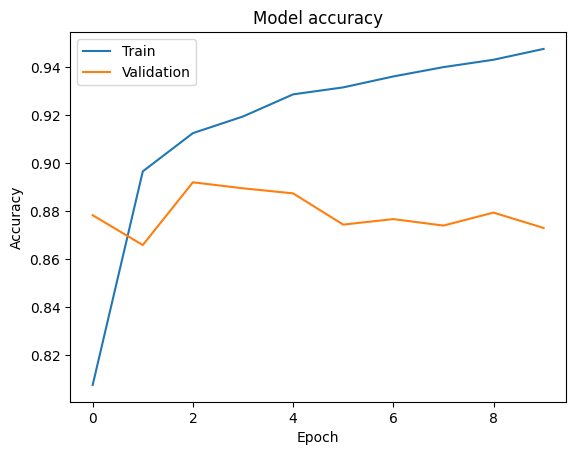

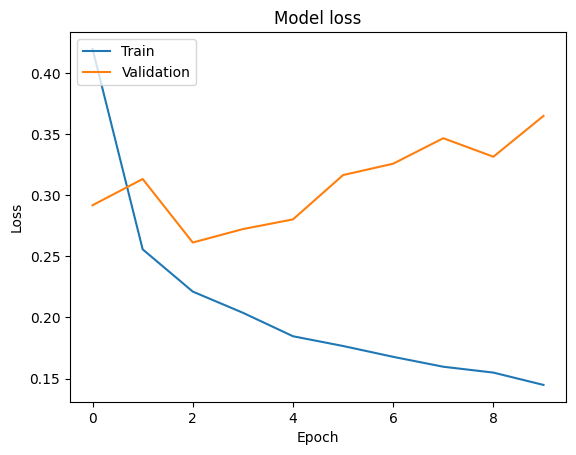

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Performance evaluation.

The understanding here is that,

1) The ACCURACY:
   * Increased exponentially first, and then became a gradual increase.
   * At the end of training, there was a high accuracy of 95.29%
   * But during testing, the model didn't have the same accuracy levels.
   * In testing, the model showed variations in different epochs.
   * Finally, the accuracy came down to 87.28%.

2) The LOSS:
   * During training, the loss was high in the first epoch and then it exponentially decreased in the next epoch.
   * From then on, there was only a gradual decrease in the loss during training.
   * At the end of training, there was only a minimal loss.
   * For the testing, there were uneven spikes in the loss factor.
   * At the end of testing, the loss was high, which may have served as a slight factor in reduction of the accuracy.

# XOR Gate classification

QUESTION:

Scenario:

The XOR gate is known for its complexity, as it outputs 1 only when the inputs are different.

This is a challenge for a Single Layer Perceptron since XOR is not linearly separable.

• Lab Task: Attempt to implement a Single Layer Perceptron in Google Colab to classify the output of an XOR gate. Perform the following steps:

• Create the XOR gate's truth table dataset.

• Implement the perceptron model and train it using the XOR dataset using MCP (McCulloch Pitts) Neuron.

• Observe and discuss the perceptron's performance in this scenario.

• Implement XOR using Multi-Layer Perceptron.

In [6]:
import numpy as np

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
y = np.array([0, 1, 1, 0])  # Outputs

# Perceptron parameters
learning_rate = 0.1
epochs = 10

# Initialize weights and bias
weights = np.random.rand(2)
bias = np.random.rand()

# Activation function (Step function)
def step_function(x):
    return 1 if x >= 0 else 0

# Training the perceptron
for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        weighted_sum = np.dot(X[i], weights) + bias
        prediction = step_function(weighted_sum)
        error = y[i] - prediction
        total_error += error**2
        # Update weights and bias
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
    print(f'Epoch {epoch+1}/{epochs}, Error: {total_error}')

print(f'Final weights: {weights}, Final bias: {bias}')

Epoch 1/10, Error: 2
Epoch 2/10, Error: 2
Epoch 3/10, Error: 2
Epoch 4/10, Error: 2
Epoch 5/10, Error: 2
Epoch 6/10, Error: 2
Epoch 7/10, Error: 2
Epoch 8/10, Error: 2
Epoch 9/10, Error: 2
Epoch 10/10, Error: 3
Final weights: [-0.17846323 -0.07146849], Final bias: 0.09444795216766527


This is using the basic equations $Y_i = \Sigma (x_i*w_i) + b$.

The activation function used here is the step function which gives 1 if the sum of the product of weights and inputs is greater than 0, 0 otherwise.

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

# XOR dataset
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# Define a simple MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.hidden_layer = nn.Linear(2, 2)  # 2 input features, 2 neurons in hidden layer
        self.output_layer = nn.Linear(2, 1)  # 1 output

    def forward(self, x):
        x = torch.sigmoid(self.hidden_layer(x))  # Sigmoid activation for hidden layer
        x = torch.sigmoid(self.output_layer(x))  # Sigmoid activation for output
        return x

# Initialize model, loss function, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 19000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Testing the model
with torch.no_grad():
    for i, x in enumerate(X):
        predicted = model(x).round().item()
        print(f'Input: {x.numpy()}, Predicted Output: {predicted}, Actual Output: {y[i].item()}')

Epoch 0, Loss: 0.25006788969039917
Epoch 1000, Loss: 0.2500137388706207
Epoch 2000, Loss: 0.24997754395008087
Epoch 3000, Loss: 0.2499450296163559
Epoch 4000, Loss: 0.2499074637889862
Epoch 5000, Loss: 0.24985556304454803
Epoch 6000, Loss: 0.24977394938468933
Epoch 7000, Loss: 0.24963001906871796
Epoch 8000, Loss: 0.2493414431810379
Epoch 9000, Loss: 0.24865932762622833
Epoch 10000, Loss: 0.24665567278862
Epoch 11000, Loss: 0.23921023309230804
Epoch 12000, Loss: 0.2099335789680481
Epoch 13000, Loss: 0.1272464543581009
Epoch 14000, Loss: 0.0524473637342453
Epoch 15000, Loss: 0.02605695091187954
Epoch 16000, Loss: 0.016009587794542313
Epoch 17000, Loss: 0.011181202717125416
Epoch 18000, Loss: 0.008450494147837162
Input: [0. 0.], Predicted Output: 0.0, Actual Output: 0.0
Input: [0. 1.], Predicted Output: 1.0, Actual Output: 1.0
Input: [1. 0.], Predicted Output: 1.0, Actual Output: 1.0
Input: [1. 1.], Predicted Output: 0.0, Actual Output: 0.0


We use about 25000 epochs in the above code in the training loop.

However, we notice that around Epoch 17000, the loss is minimized, but we don't get the target output.

In Epoch 19000, we get the target output.